# Программа визуализации расчетов 2D Уравнения Переноса

In [7]:
from configs import *

print(OutputDir)
print(CalculationResultsPath)
print(TE2DCalculationsPath)

print(PlotOutputPath)
print(TE2DPlotPath)

C:\Programing\Projects\DigitalGeometry\Programs\Output
C:\Programing\Projects\DigitalGeometry\Programs\Output\CalculationResults
C:\Programing\Projects\DigitalGeometry\Programs\Output\CalculationResults\TransportEquation\Solver2D
C:\Programing\Projects\DigitalGeometry\Programs\Output\GraphicsResults
C:\Programing\Projects\DigitalGeometry\Programs\Output\GraphicsResults\TransportEquation\Solver2D


## Считывание рассчитанных значений из файла

In [8]:
def read2DOutput(filename):
    file = open(filename, "r")

    meshParamsLine = file.readline()
    cellCountX, cellCountY, dx = [float(val) for val in meshParamsLine.split("\t") if val != ""][:4]
    cellCountX = int(cellCountX)
    cellCountY = int(cellCountY)
    
    timeParamsLine = file.readline()
    NTimeSteps, realNTimeSteps, dt  = [float(val) for val in timeParamsLine.split("\t") if val != ""][:3]
    NTimeSteps = int(NTimeSteps)
    realNTimeSteps = int(realNTimeSteps)
    
    frames = []
    for i in range(realNTimeSteps+1):
        f = []
        for y in range(cellCountY):
            lineX = file.readline()
            fx = [float(fi) for fi in lineX.split("\t") if len(fi)>1 or fi.isnumeric()]
            f.append(fx)
        frames.append(f.copy())
    
    file.close()
    return cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames

## Построение графиков

In [9]:
import matplotlib.pyplot as plt

In [33]:
def lowValueHighlighter(f):
    fh = []
    for y in range(len(f)):
        fh.append([])
        for x in range(len(f[y])):
            fh[y].append(pow(abs(f[y][x]), 0.125))
    return fh

In [11]:
def plotArea2D(frame, plotTitle):
    fig = plt.figure(figsize=(12, 12))
    plt.imshow(frame, origin='lower')
    plt.savefig(downDir(plotOutPath, plotTitle+".png"))

In [12]:
def linspace(a, b, n=10):
    if n < 2:
        return b
    diff = (float(b) - a)/(n - 1)
    return [diff * i + a  for i in range(n)]

def plotArea2DFrames(frames, plotTitle, nFrames):
    f, axs = plt.subplots(nFrames, 1,figsize=(6, 6*nFrames))
    for i, t in enumerate(linspace(0, len(frames)-1, nFrames)):
        ti = int(t)
        plt.subplot(nFrames, 1, i+1)
        plt.title('t:'+str(ti))
        plt.imshow(frames[ti], origin='lower')    
    plt.savefig(downDir(plotOutPath, plotTitle+".png"))

## Построение анимации

In [13]:
from celluloid import Camera

In [14]:
def animation2D(cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames, slowmo, plotTitle, highlight = False):
    fig = plt.figure(figsize=(12, 12))
    camera = Camera(fig)
    for frame in frames:
        if highlight:
            plt.imshow(lowValueHighlighter(frame), origin='lower')
        else:
            plt.imshow(frame, origin='lower')
        camera.snap()
    animation = camera.animate()

    time = dt * NTimeSteps
    print("Animation real time: ", time)
    realTimeStep = time / realNTimeSteps * slowmo
    print("Animation real time step: ", realTimeStep)
    fps = 1 / realTimeStep
    print("Animation fps: ", fps)

    if highlight:
        animation.save(downDir(plotOutPath, plotTitle+'_anim_hl.gif'), writer='PillowWriter', fps=fps)
    else:
        animation.save(downDir(plotOutPath, plotTitle+'_anim.gif'), writer='PillowWriter', fps=fps)

## Solve2DRectMovementTest

In [27]:
title = "Solve2DRectMovementTest"
calcResPath = downDir(TE2DCalculationsPath, title)
plotOutPath = downDir(TE2DPlotPath, title)

In [28]:
cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames = read2DOutput(downDir(calcResPath, "TE_area_128_t_512.txt"))

In [29]:
print("cellCountX: ", cellCountX)
print("cellCountY: ", cellCountY)
print("dx: ", dx)
print("NTimeSteps: ", NTimeSteps)
print("realNTimeSteps: ", realNTimeSteps)
print("dt: ", dt)

cellCountX:  128
cellCountY:  128
dx:  0.015625
NTimeSteps:  512
realNTimeSteps:  50
dt:  0.00195312


### Построение некоторых графиков избранных расчетов

#### Построение графиков:

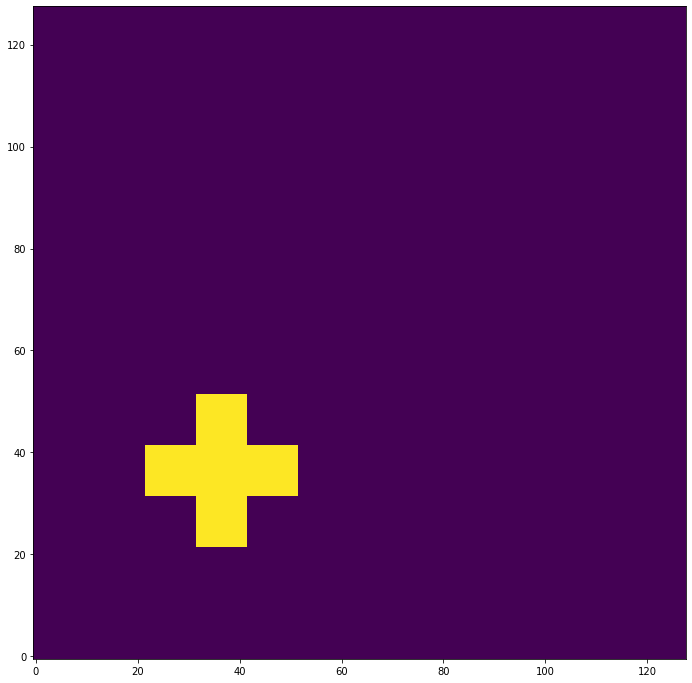

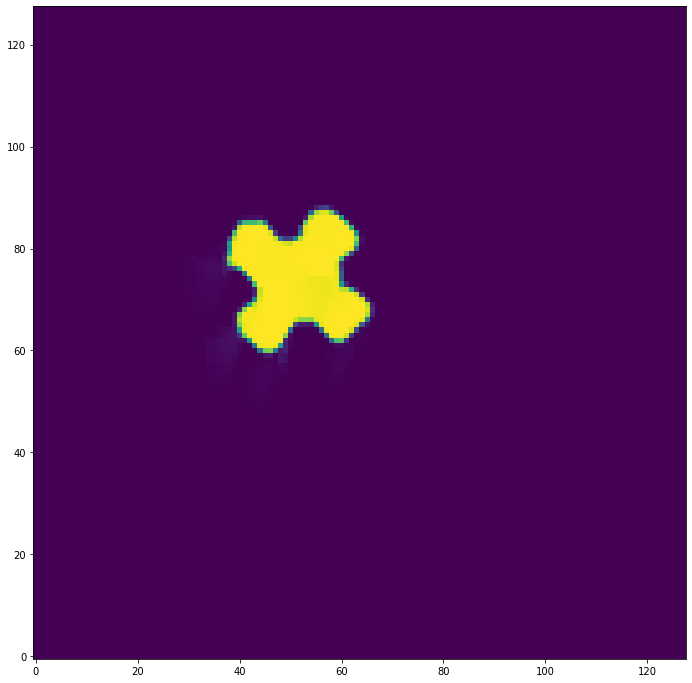

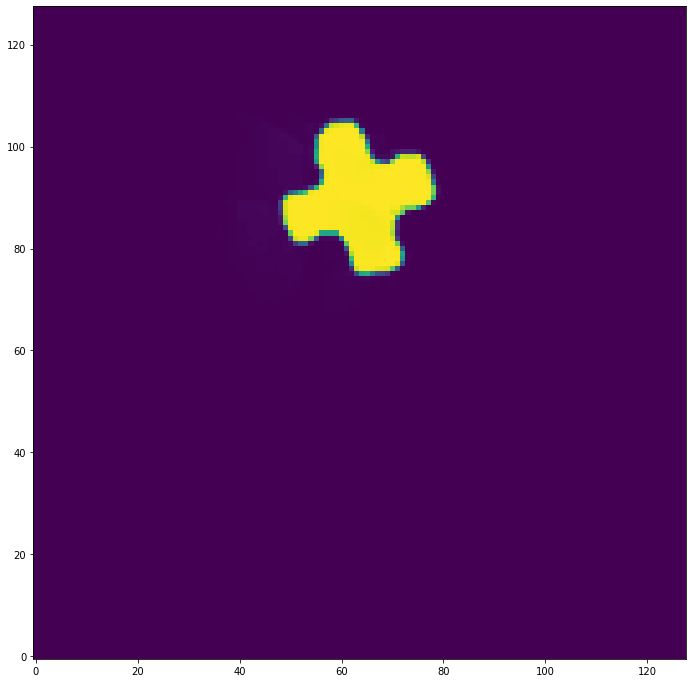

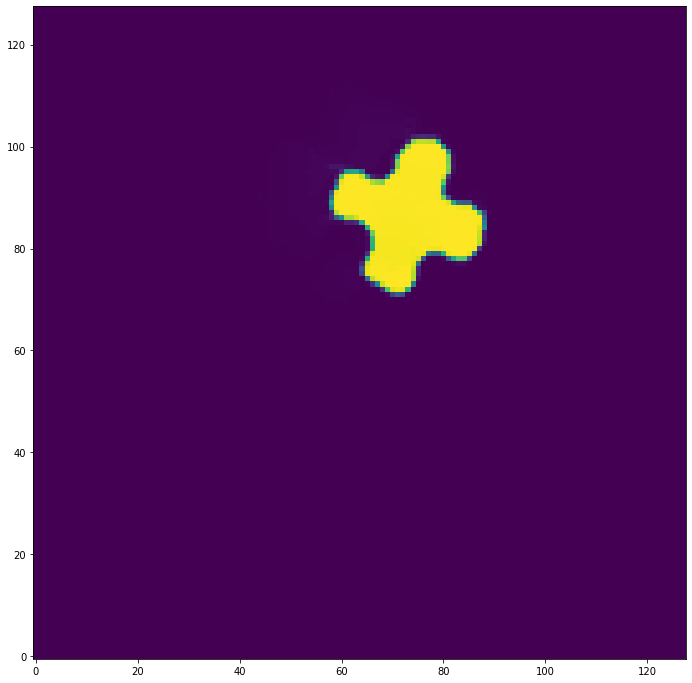

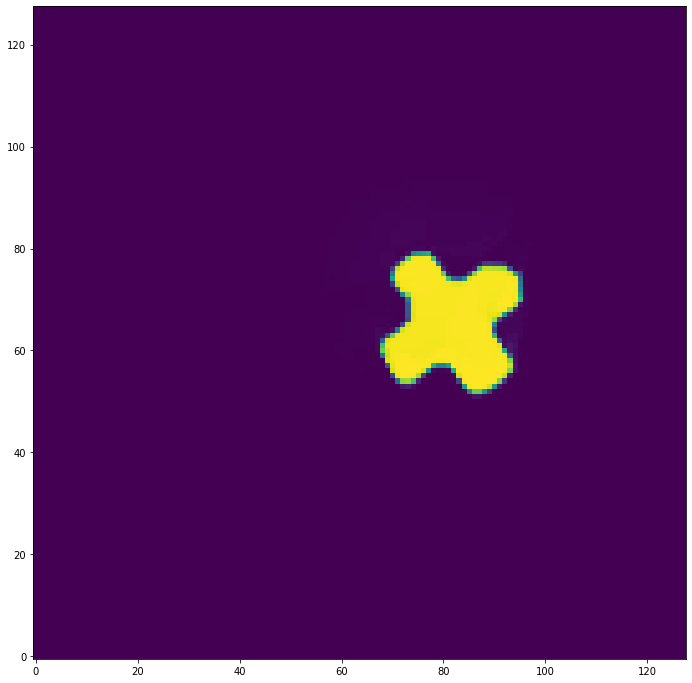

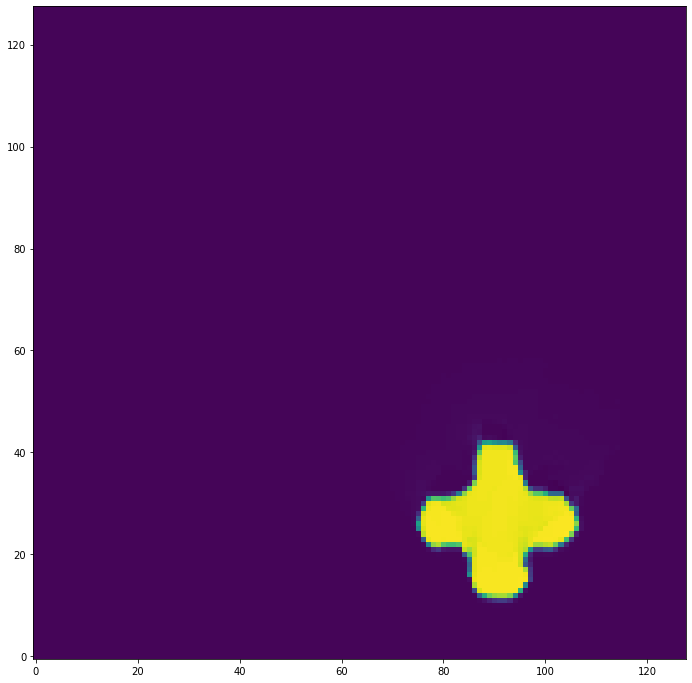

In [30]:
for t in range(0, len(frames), 10):
    plotArea2D(frames[t], title+"_t"+str(t))

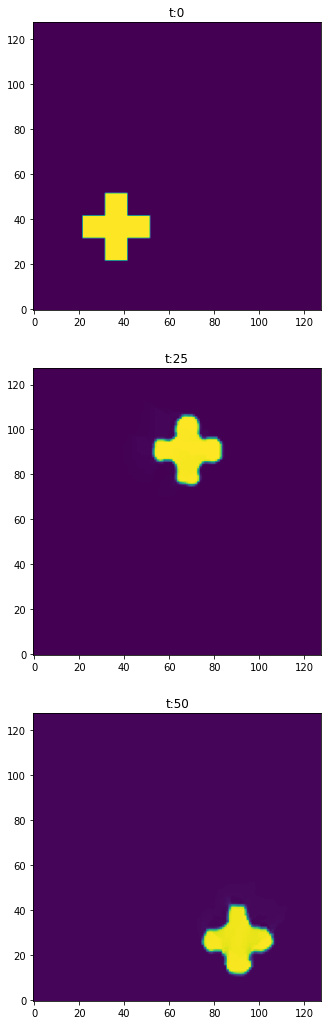

In [31]:
plotArea2DFrames(frames, title, 3)

#### Построение анимации:

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation real time:  0.99999744
Animation real time step:  0.0399998976
Animation fps:  25.00006400016384


MovieWriter PillowWriter unavailable; using Pillow instead.


Animation real time:  0.99999744
Animation real time step:  0.0399998976
Animation fps:  25.00006400016384


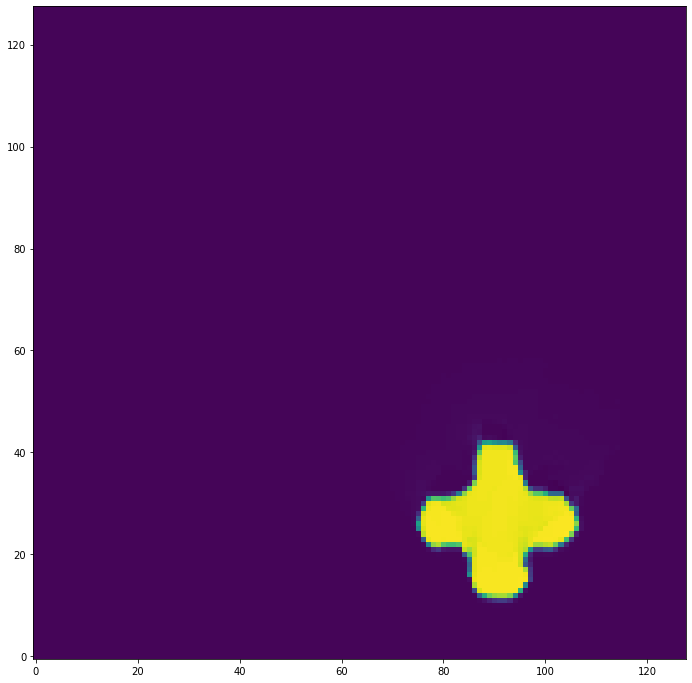

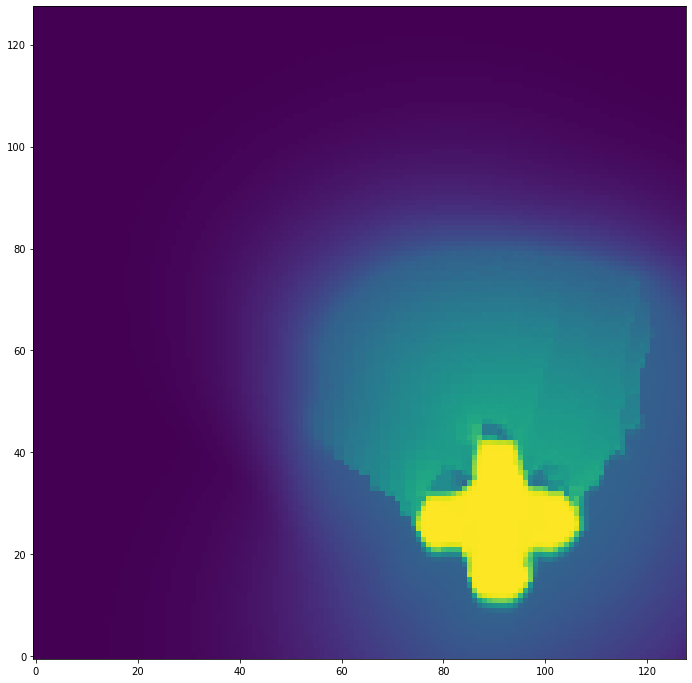

In [34]:
animation2D(cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames, 2, title, False)
animation2D(cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames, 2, title, True)

## Solve2DWhiteBearMovementTest

In [15]:
title = "Solve2DWhiteBearMovementTest"
calcResPath = downDir(Calculation2DResultsPath, title)
plotOutPath = downDir(Plot2DOutputPath, title)

In [16]:
cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames = read2DOutput(downDir(calcResPath, "area_128x128_t_400.txt"))

In [17]:
print("cellCountX: ", cellCountX)
print("cellCountY: ", cellCountY)
print("dx: ", dx)
print("NTimeSteps: ", NTimeSteps)
print("realNTimeSteps: ", realNTimeSteps)
print("dt: ", dt)

cellCountX:  128
cellCountY:  128
dx:  0.0078125
NTimeSteps:  400
realNTimeSteps:  50
dt:  0.015625


### Построение некоторых графиков избранных расчетов

#### Построение графиков:

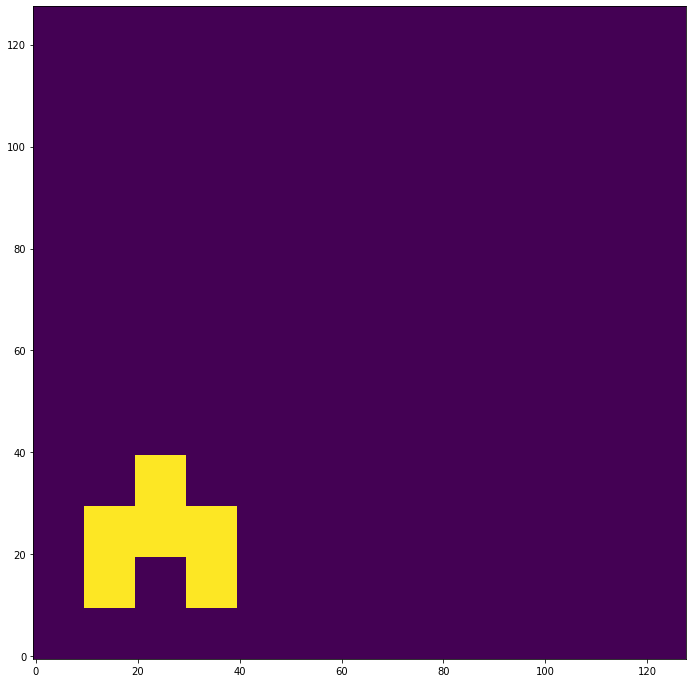

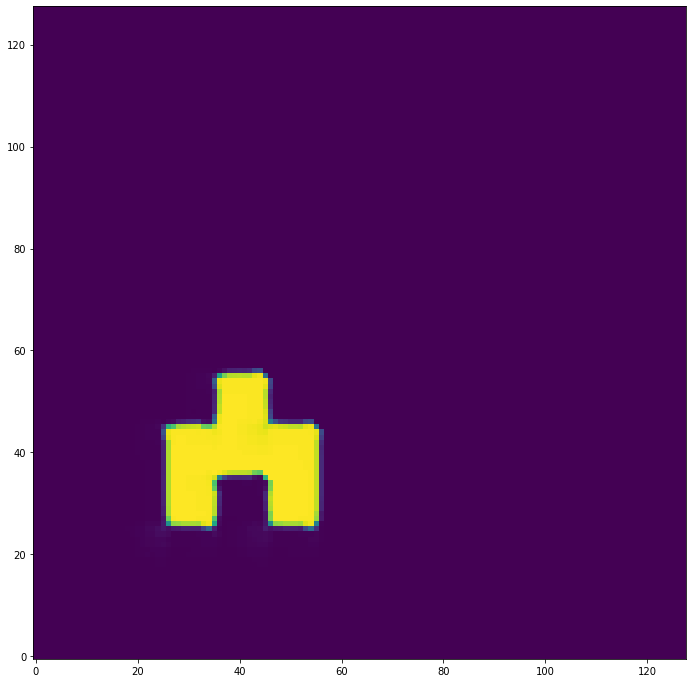

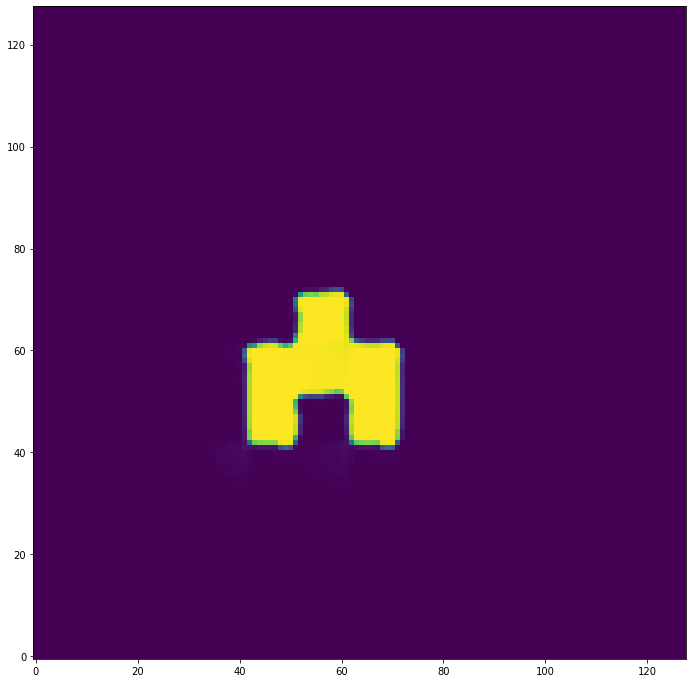

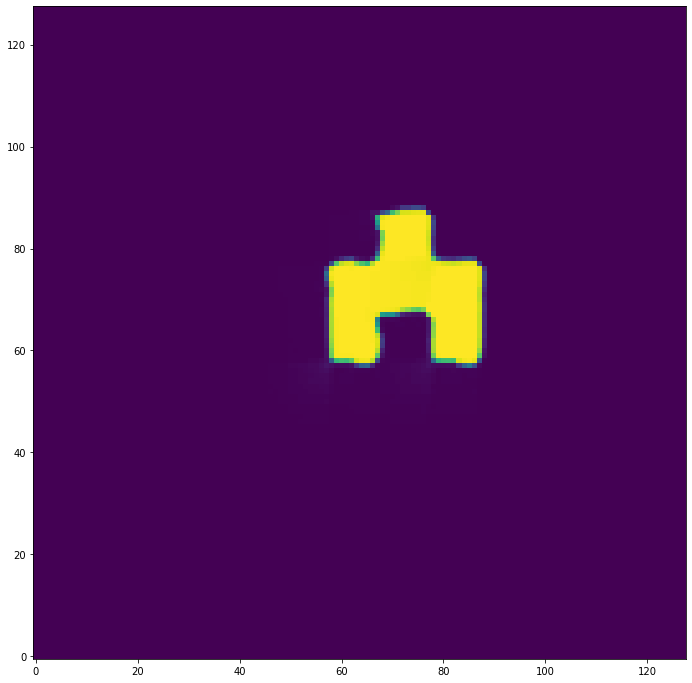

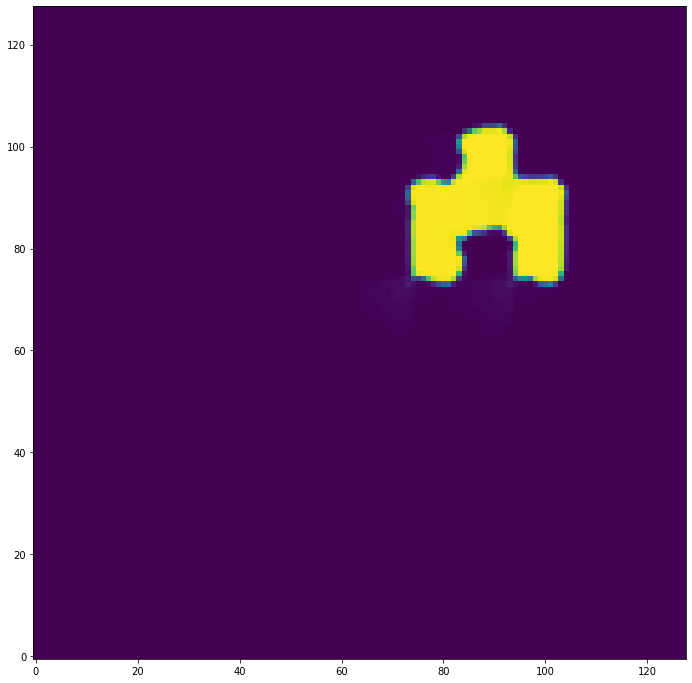

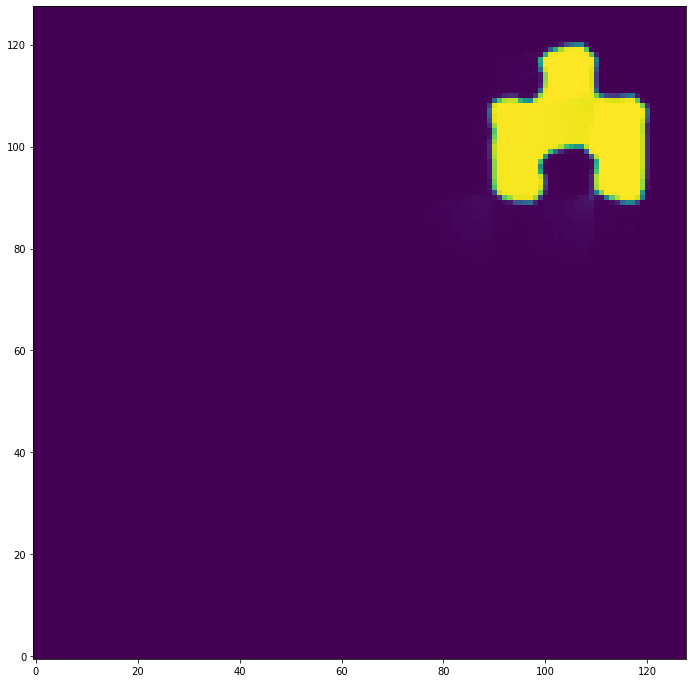

In [18]:
for t in range(0, len(frames), 10):
    plotArea2D(frames[t], title+"_t"+str(t))

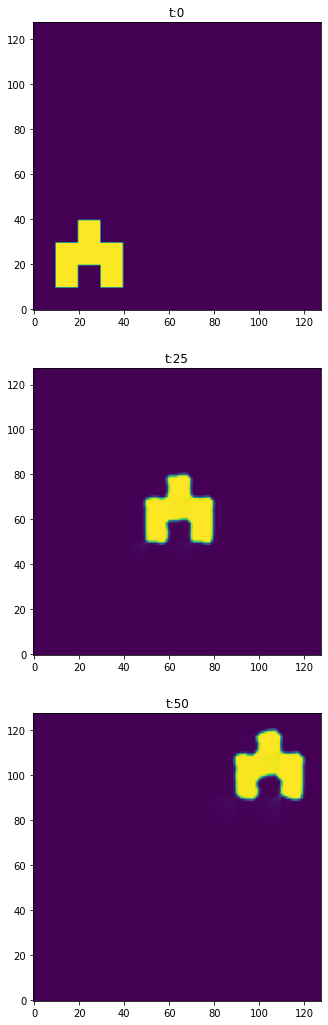

In [19]:
plotArea2DFrames(frames, title, 3)

#### Построение анимации:

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation real time:  6.25
Animation real time step:  0.25
Animation fps:  4.0


MovieWriter PillowWriter unavailable; using Pillow instead.


Animation real time:  6.25
Animation real time step:  0.25
Animation fps:  4.0


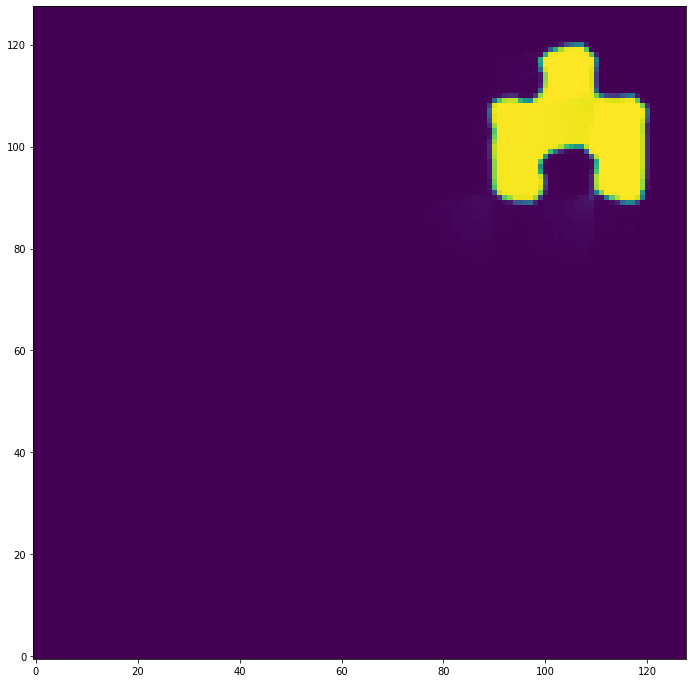

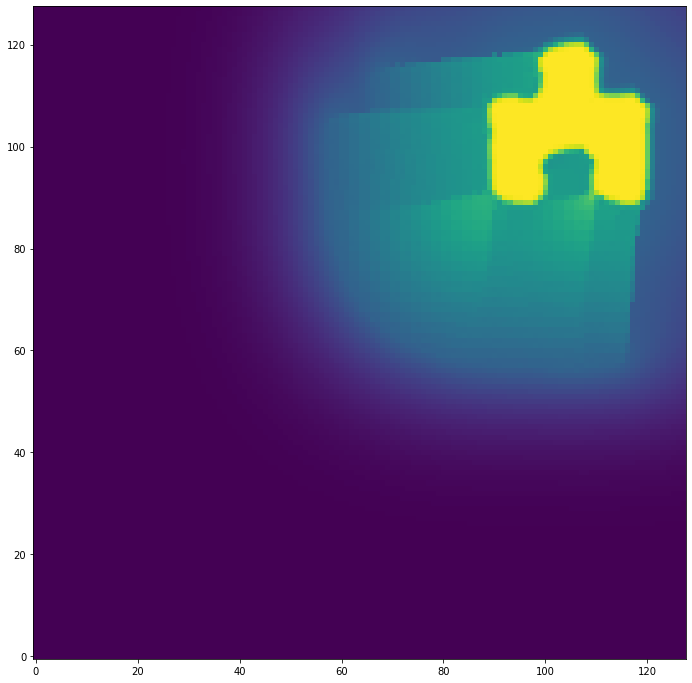

In [20]:
animation2D(cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames, 2, title, False)
animation2D(cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames, 2, title, True)